In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def gerar_dataset():

    dataset_original = pd.read_csv("Vendas.csv",encoding = 'iso-8859-1', sep=";") # dataset

    temp_anos = set() # temporário
    datas = dataset_original["Data Venda"] # datas brutas
        
    meses = {"Mes":[]}
    anos = {"Ano":[]}

    for k in range(len(datas)):
        d = int(datas[k][6::])
        meses["Mes"].append(int(datas[k][3:5]))
        anos["Ano"].append(int(datas[k][6::]))
        temp_anos.add(d)

    meses = pd.DataFrame(meses) # meses obtidos
    anos = pd.DataFrame(anos) # anos abotidos
    
    dataset_original.insert(0, "Mes", meses, allow_duplicates=False) # meses tratados
    dataset_original.insert(0, "Ano", anos, allow_duplicates=False) # anos tratados

    return dataset_original

In [4]:
dataset = gerar_dataset()

In [3]:
# A - Faça um gráfico do total de vendas por ano

def total_vendas_por_ano(data):

    dic = {"Ano":[],"ValorVenda":[]}
    anosSet = [2014,2015,2016,2017,2018,2019]
    
    for i in anosSet:
        dat = data.loc[data["Ano"] == int(i)]
        dic["Ano"].append(i)
        valores = dat["ValorVenda"]
        valores = valores.values.tolist()
        for v in range(len(valores)):
            valores[v] = float(valores[v].replace(",", "."))
        soma = sum(valores)
        dic["ValorVenda"].append(soma)

    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Ano", y="ValorVenda", kind="bar", data = dataset, estimator = np.sum).set(title="Gráfico do total de vendas por ano").fig.set_figwidth(16)

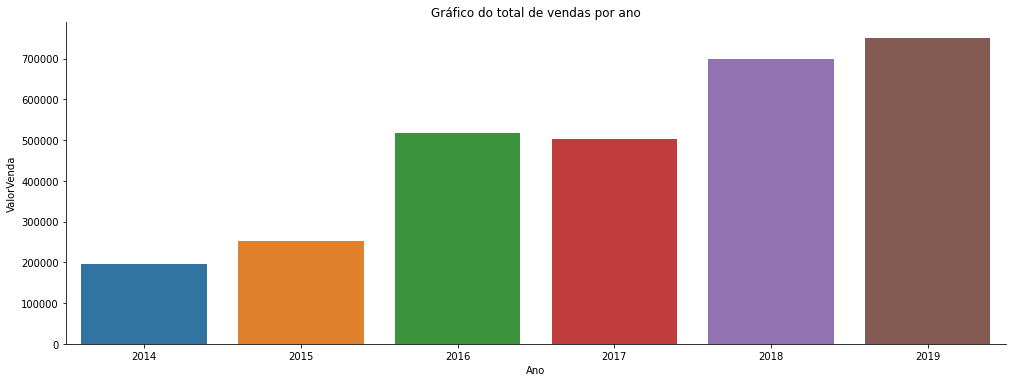

In [4]:
total_vendas_por_ano(dataset)

In [5]:
# B - Faça um gráfico do total de vendas por categoria

def total_vendas_por_categoria(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"].values.tolist()

    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)

    sns.catplot(x="Categoria", y="ValorVenda", kind="bar", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria").fig.set_figwidth(16)

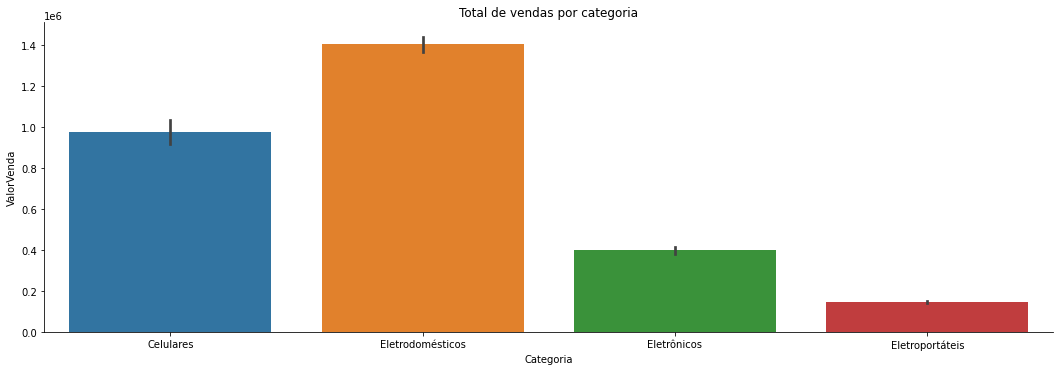

In [6]:
total_vendas_por_categoria(dataset)

In [7]:
# C - Faça um gráfico do total de vendas por categoria por ano

def total_vendas_por_categoria_por_ano(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Categoria", y="ValorVenda", kind="bar", hue = "Ano", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria por ano").fig.set_figwidth(16)

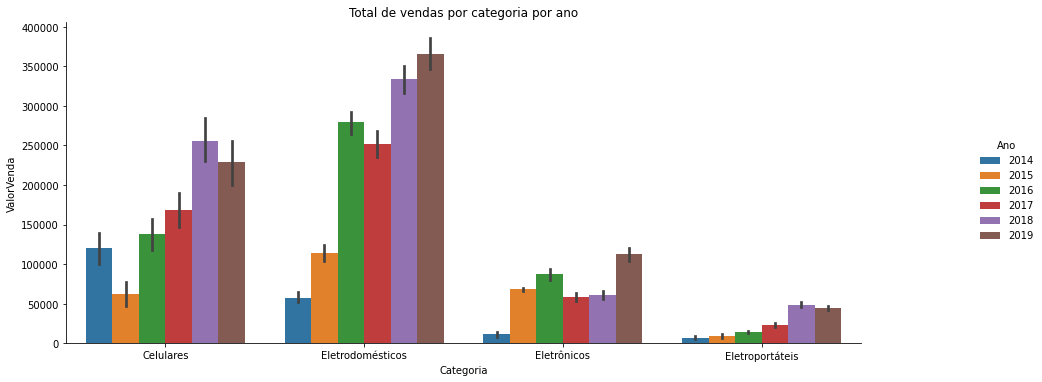

In [8]:
total_vendas_por_categoria_por_ano(dataset)

In [9]:
# D - Faça um gráfico do total de vendas por ano e categoria

def total_vendas_por_ano_e_categoria(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Ano", y="ValorVenda", kind="bar", hue="Categoria", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria por ano").fig.set_figwidth(16)

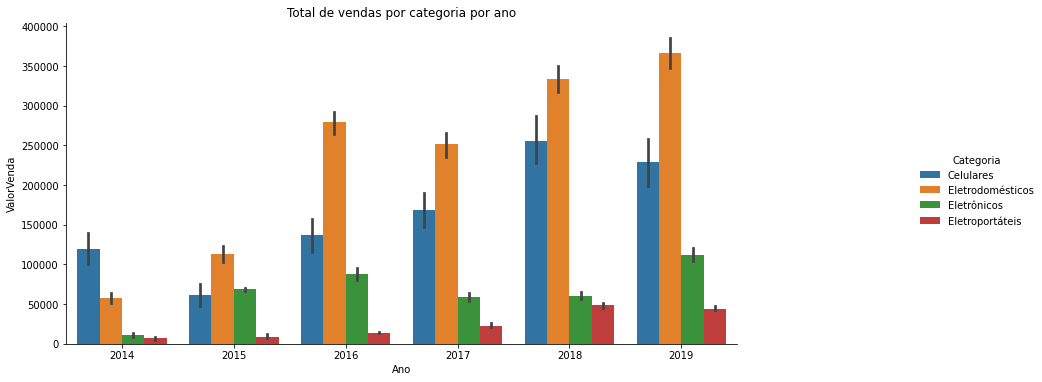

In [10]:
total_vendas_por_ano_e_categoria(dataset)

In [11]:
# E - Faça um gráfico do total de vendas por categoria pelos meses para cada ano

def total_vendas_por_categoria_pelos_meses_para_cada_ano(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"],"Mes":data["Mes"]}
    anosSet = [2014,2015,2016,2017,2018,2019]

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)

    for ano in anosSet:
        dataset_for = dataset.loc[dataset["Ano"] == ano]
        sns.catplot(x="Mes", y="ValorVenda", kind="bar", hue="Categoria", data = dataset_for, estimator = np.sum).set(title="Total de vendas por categoria pelos meses para o ano de "+str(ano)).fig.set_figwidth(16)
        

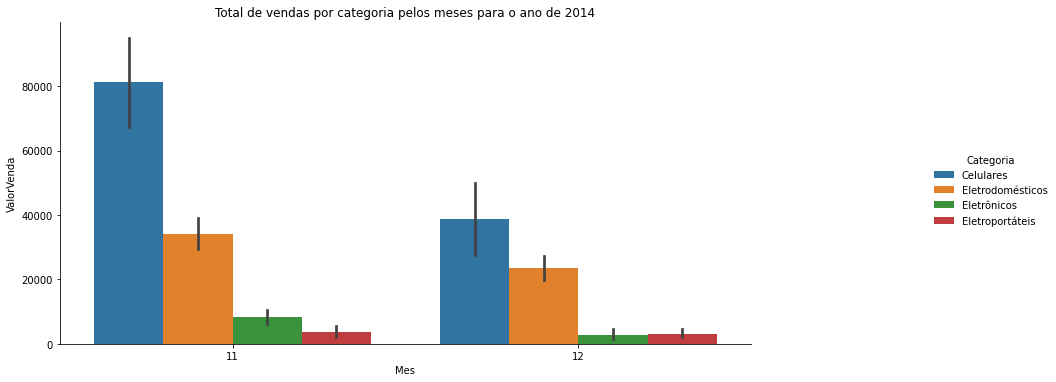

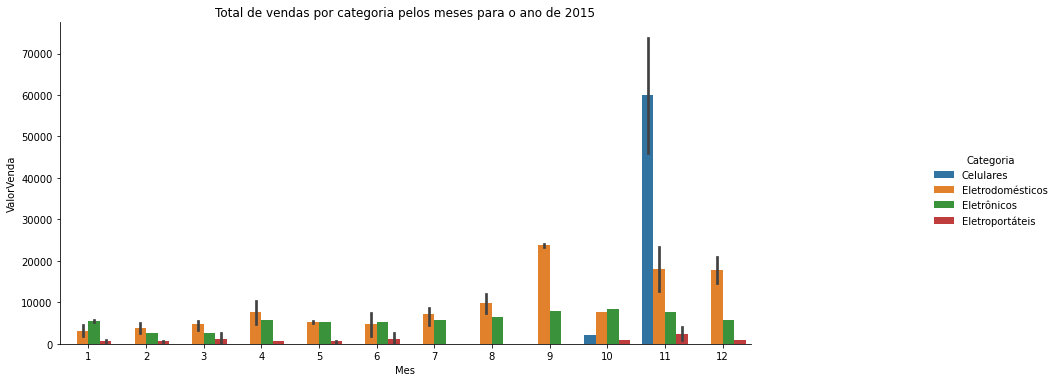

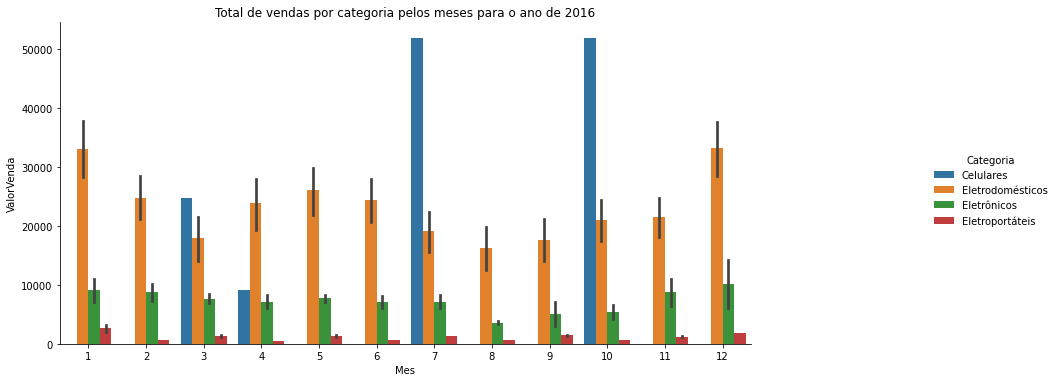

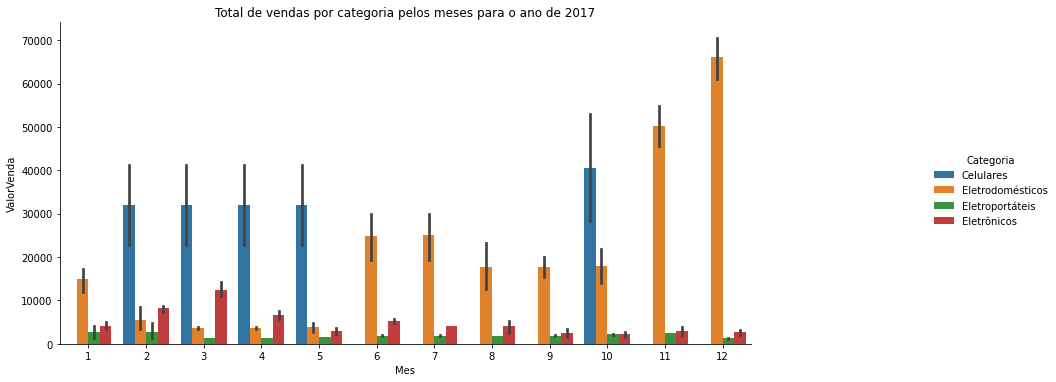

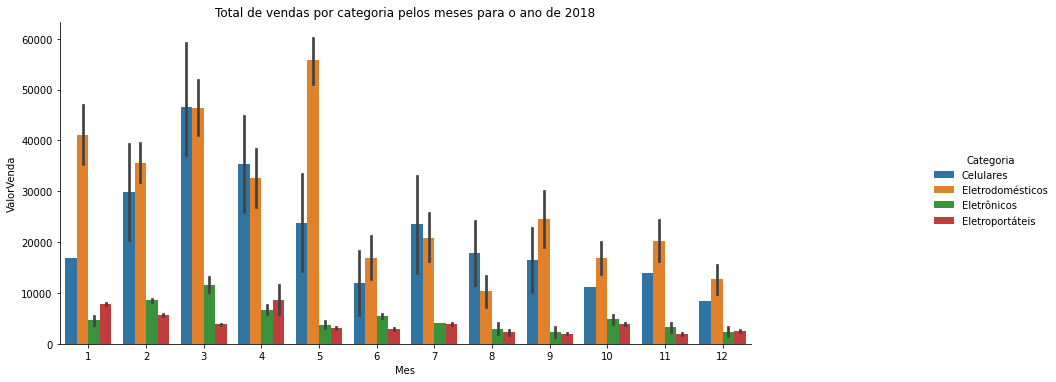

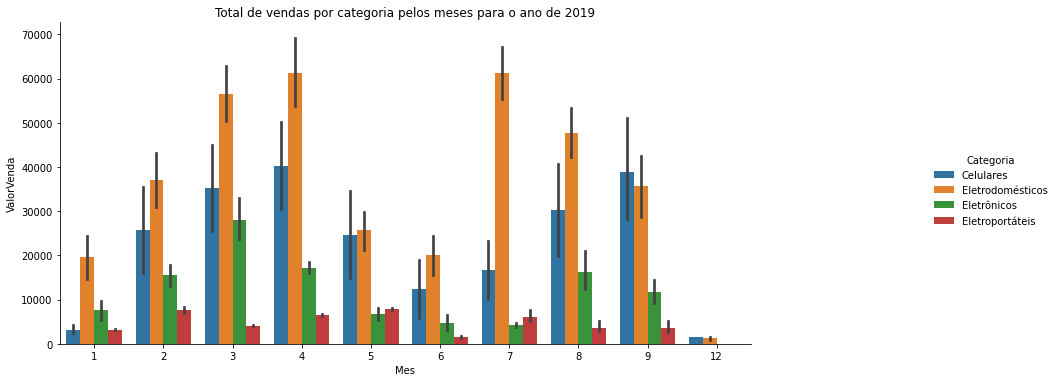

In [12]:
total_vendas_por_categoria_pelos_meses_para_cada_ano(dataset)

In [13]:
# F - Faça um gráfico dos produto mais vendido por cada fabricante

def produto_mais_vendido_por_cada_fabricante(data):
    
    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"],"Mes":data["Mes"],"Produto":data["Produto"],"Fabricante":data["Fabricante"],"Loja":data["Loja"]}

    valores = data["ValorVenda"].values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    fabricantes = ["Motorola", "Samsung", "LG", "Sony", "Consul", "Brastemp", "Panasonic", "Electrolux", "HP", "Dell", "Epson", "Britânia", "Arno", "Philco"]

    for fabricante in fabricantes:
        dataset_for = dataset.loc[dataset["Fabricante"] == fabricante]        
        sns.catplot(x="Fabricante", y="ValorVenda", kind="bar", hue="Produto", data = dataset_for, estimator = np.sum).set(title="Produto mais vendido para o fabricante "+str(fabricante)).fig.set_figwidth(8)
        

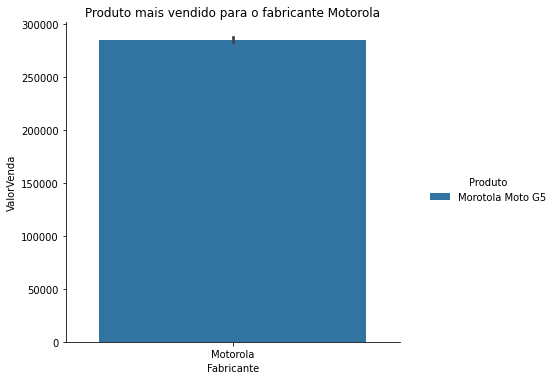

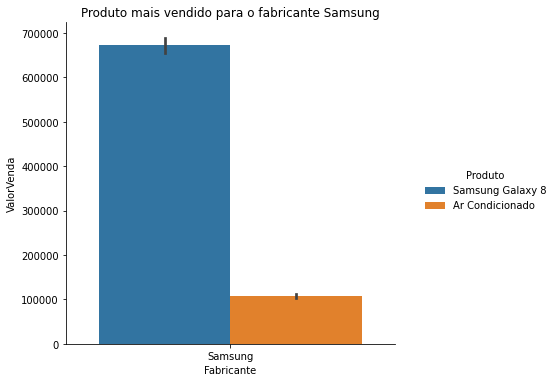

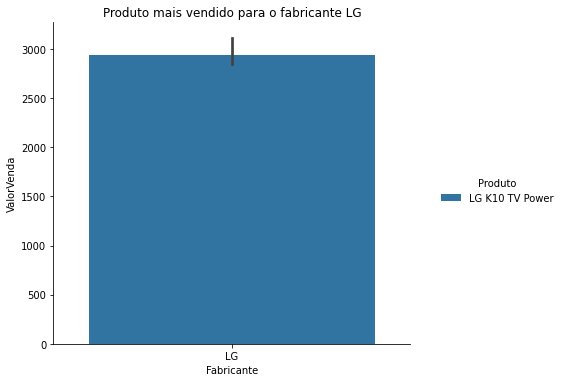

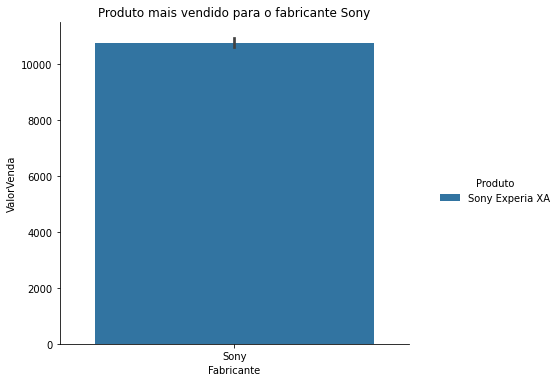

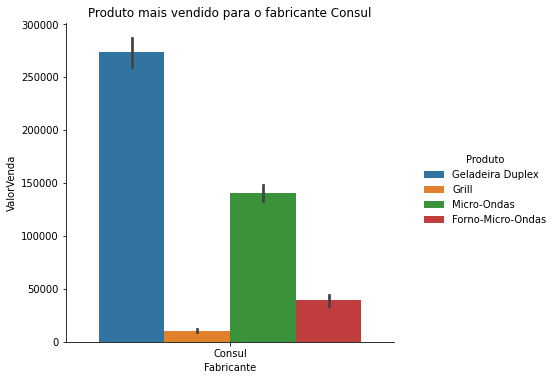

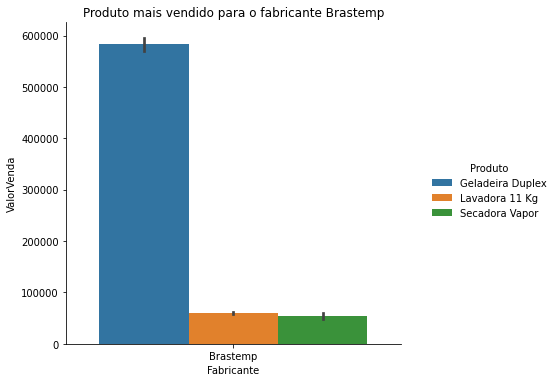

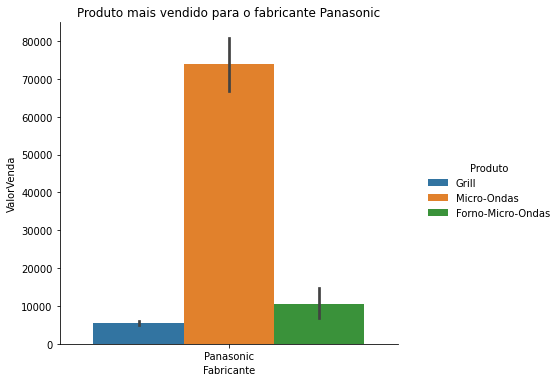

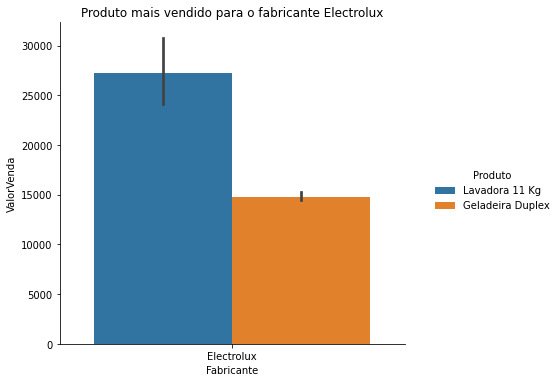

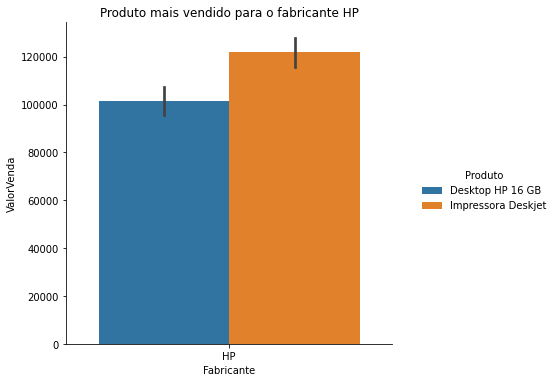

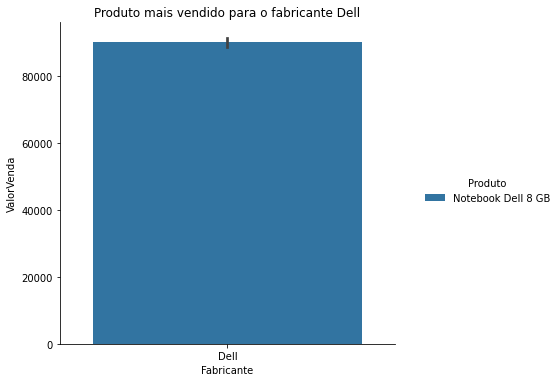

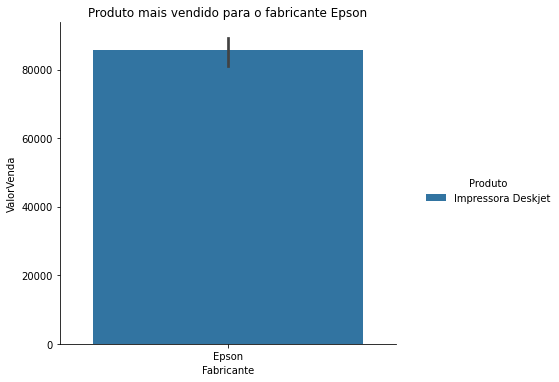

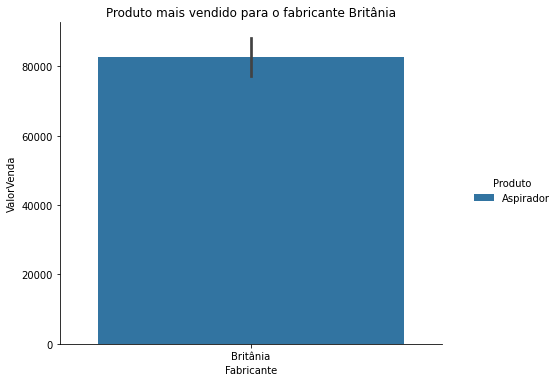

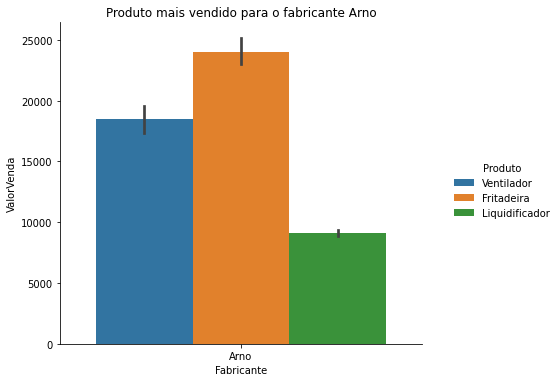

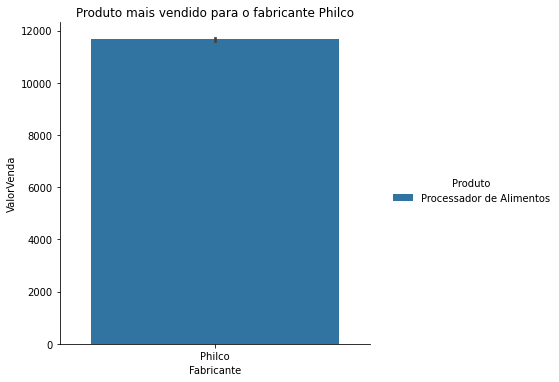

In [14]:
produto_mais_vendido_por_cada_fabricante(dataset)

In [15]:
# G - Faça um gráfico das vendas das lojas por categoria

def vendas_das_lojas_por_categoria(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"],"Mes":data["Mes"],"Produto":data["Produto"],"Fabricante":data["Fabricante"],"Loja":data["Loja"]}
    lojas = ["R1296", "BA7783", "JP8825", "RG7742", "AL1312", "GA7751", "JB6325"]
    
    valores = data["ValorVenda"].values.tolist()
    
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Loja", y="ValorVenda", kind="bar", hue="Categoria", data = dataset, estimator = np.sum).set(title="Vendas das lojas por categoria (geral)").fig.set_figwidth(16)

    for loja in lojas:
        dataset_for = dataset.loc[dataset["Loja"] == loja]
        sns.catplot(x="Categoria", y="ValorVenda", kind="bar", hue="Categoria", data = dataset_for, estimator = np.sum).set(title="Vendas das lojas por categoria para a loja "+str(loja)).fig.set_figwidth(8)

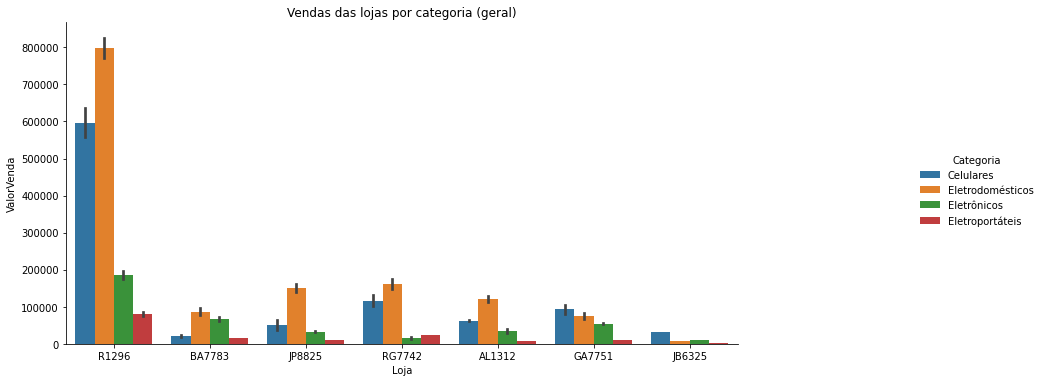

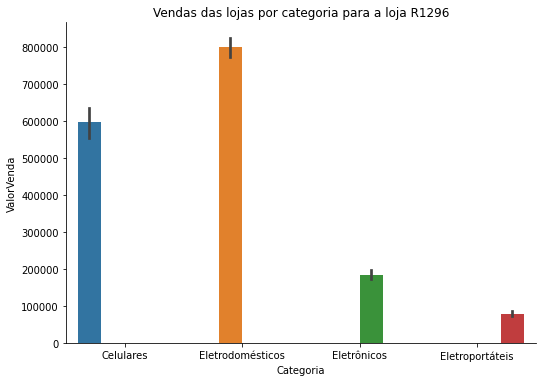

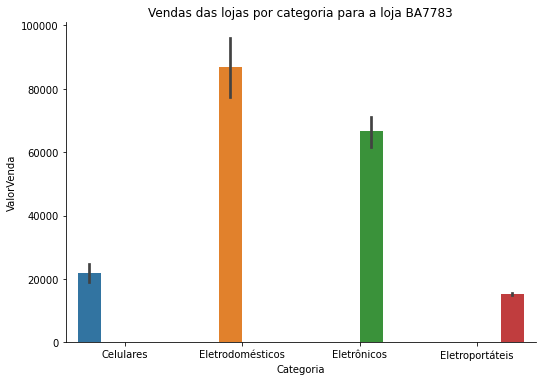

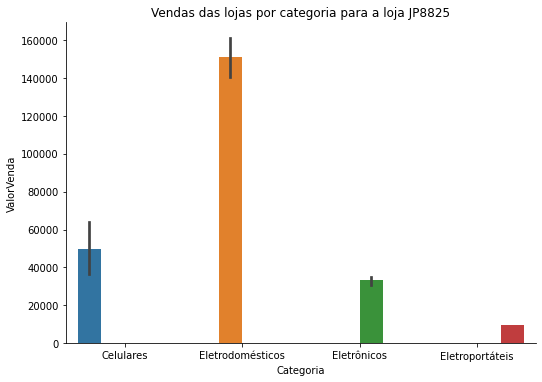

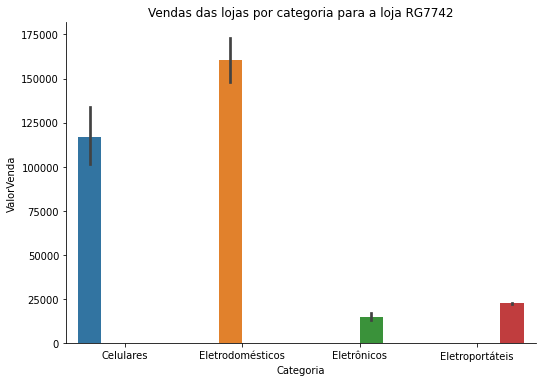

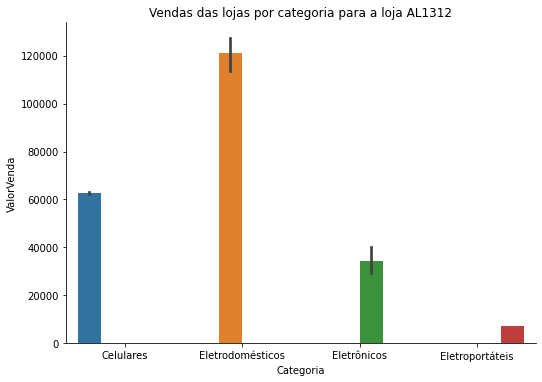

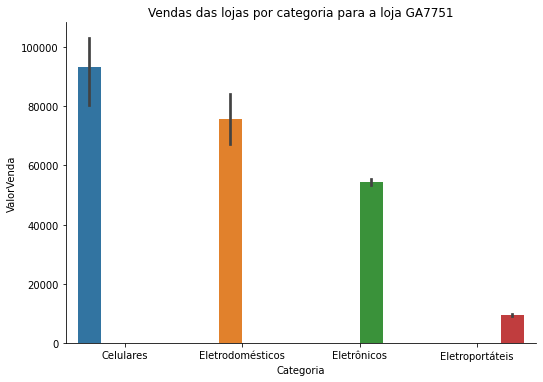

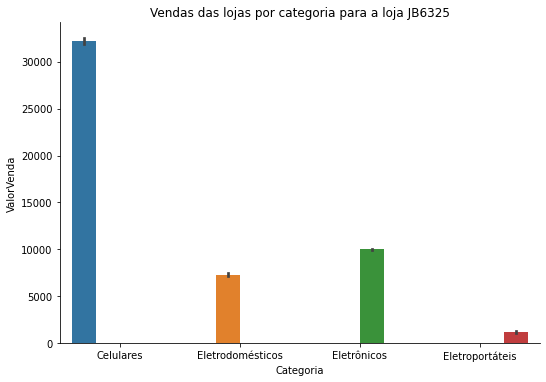

In [16]:
vendas_das_lojas_por_categoria(dataset)

In [11]:
# H - Faça um Ranking dos produtos com maiores venda no geral e por loja

def ranking_dos_produtos_com_maiores_venda_geral(data):
    dataFrame = data
    sns.catplot(x="Valor Vendas", y="Produto", kind="bar", data = dataFrame, estimator = np.sum, palette="tab10").set(title="Ranking dos produtos com maiores venda no geral").fig.set_figwidth(8)


def ranking_dos_produtos_com_maiores_venda_por_loja(data, produtos):
    dataFrame = data
    produtos_set = produtos
    lojas = ["R1296", "BA7783", "JP8825", "RG7742", "AL1312", "GA7751", "JB6325"]
    for loja in lojas:
        dataset_for_loja = dataset.loc[dataset["Loja"] == loja]

        valor_das_vendas = []
        for prod in produtos_set:
            dataset_for_produto = dataset_for_loja.loc[dataset_for_loja["Produto"] == prod]
            lista = dataset_for_produto["ValorVenda"].values.tolist()

            soma = 0
            for k in lista:
                  soma+= float(str(k).replace(",", "."))
                
            valor_das_vendas.append(soma)

        dataFrame = pd.DataFrame({"Produto":list(produtos),"Valor Vendas":valor_das_vendas})
        dataFrame = dataFrame.sort_values(['Valor Vendas','Produto'], ascending=False)

        sns.catplot(x="Valor Vendas", y="Produto", kind="bar", data = dataFrame, estimator = np.sum, palette="tab10").set(title="Ranking dos produtos com maiores venda para loja "+str(loja)).fig.set_figwidth(8)

    

def ranking_dos_produtos_com_maiores_venda_geral_e_por_loja(data):

    dic = {"Produto":data["Produto"], "Ano":data["Ano"],"ValorVenda":[],"Fabricante":data["Fabricante"],"Loja":data["Loja"]}
    valores = data["ValorVenda"].values.tolist()
    
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    
    dataset = pd.DataFrame(dic)

    produtos_set = set()
    
    for p in range(len(dataset["Produto"])):
        produto = dic["Produto"][p]
        produtos_set.add(produto)

    valor_das_vendas = []
    for prod in produtos_set:
        datP = dataset.loc[dataset["Produto"] == prod]
        lista = datP["ValorVenda"].values.tolist()
        soma = sum(lista)
        valor_das_vendas.append(soma)

    dataFrame = pd.DataFrame({"Produto":list(produtos_set),"Valor Vendas":valor_das_vendas})
    dataFrame = dataFrame.sort_values(['Valor Vendas','Produto'], ascending=False)
    
    ranking_dos_produtos_com_maiores_venda_geral(dataFrame)
    ranking_dos_produtos_com_maiores_venda_por_loja(dataFrame, produtos_set)

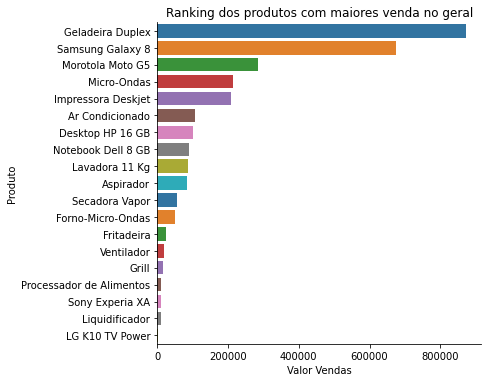

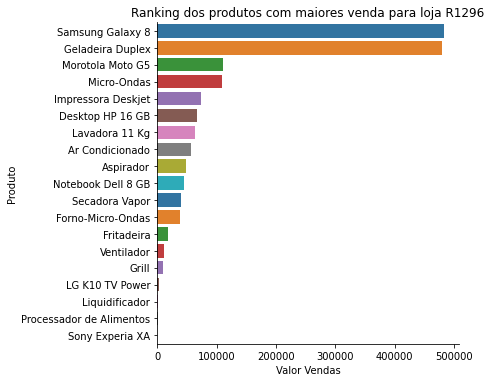

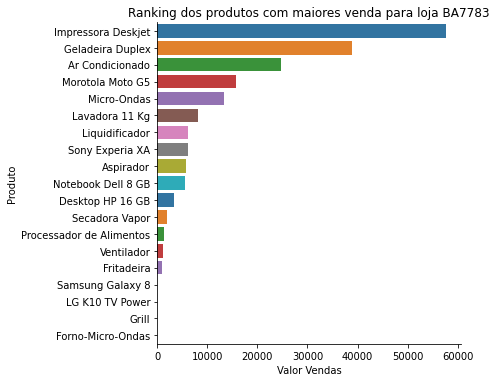

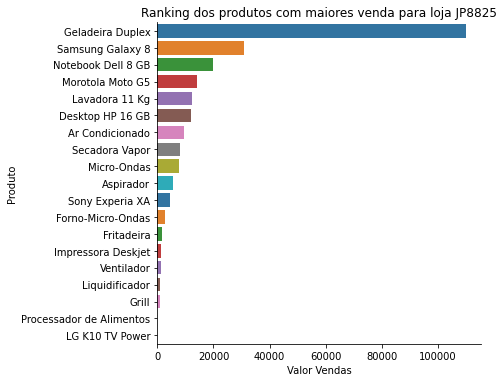

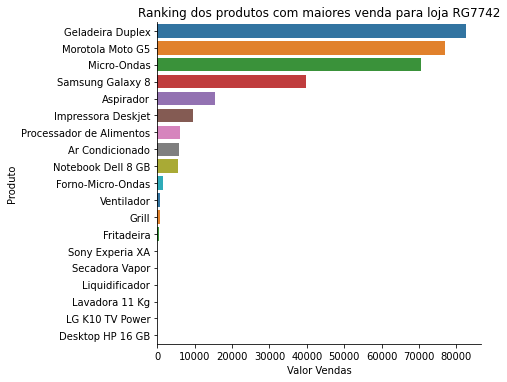

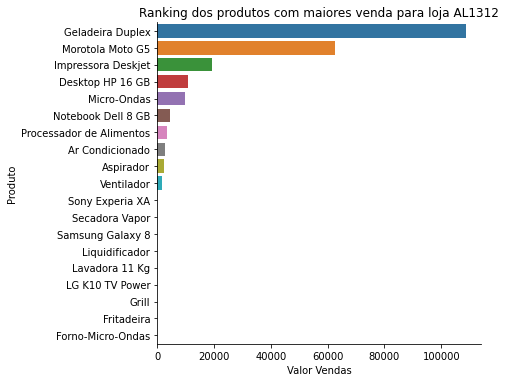

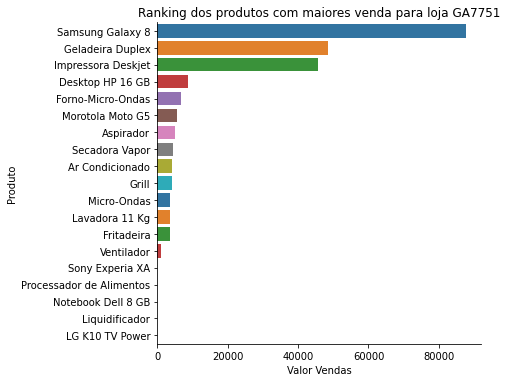

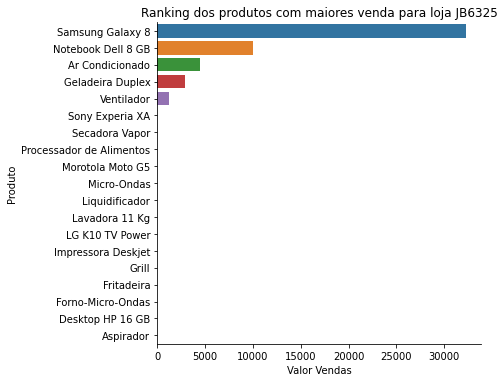

In [12]:
ranking_dos_produtos_com_maiores_venda_geral_e_por_loja(dataset)